<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Binary_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Logistic Regression

The products produced by a process are classified as either accepted (1) or defects (0) by the customers. The response depends on two quality characteristics; the weight (g) and the diameter (cm) of the product. In order to model the relationship, the quality manager collected a sample of 15 products. What is the expected response for a product that weights 150 g and has a diameter of 3.31cm?

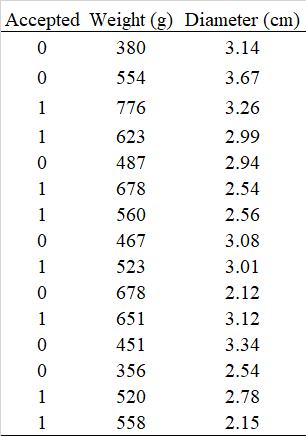

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

# Data provided by the user
data = pd.DataFrame({
    'Accepted': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    'Weight': [380, 554, 776, 623, 487, 678, 560, 467, 523, 678, 651, 451, 356, 520, 558],
    'Diameter': [3.14, 3.67, 3.26, 2.99, 2.94, 2.54, 2.56, 3.08, 3.01, 2.12, 3.12, 3.34, 2.54, 2.78, 2.15]
})

# Separate the features and the target variable
X = data[['Weight', 'Diameter']]
y = data['Accepted']

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)


# We will use the previously defined data and the logistic regression model which was already trained.
# We will use the model to calculate the Logit (L) for each observation.
# The Logit (L) can be calculated as the dot product of the coefficients and the feature values plus the intercept.

# Get the coefficients and intercept from the model
b = model.coef_[0]
b0 = model.intercept_[0]

# Calculate the Logit for each observation (bo + b1*X1 + b2*X2)
logit_calculated = b0 + np.dot(X, b)

# Recalculate e^L, P(X), and LL with the newly calculated Logit values
eL_calculated = np.exp(logit_calculated)
PX_calculated = eL_calculated / (1 + eL_calculated)
LL_calculated = y * np.log(PX_calculated) + (1 - y) * np.log(1 - PX_calculated)

# Create the resulting DataFrame with the newly calculated values
result_df_calculated = pd.DataFrame({
    'Logit (L)': logit_calculated,
    'e^L': eL_calculated,
    'P(X)': PX_calculated,
    'LL': LL_calculated
})

# Add the previously calculated columns to the original data
full_data_df = data.copy()
full_data_df['Logit (L)'] = logit_calculated
full_data_df['e^L'] = eL_calculated
full_data_df['P(X)'] = PX_calculated
full_data_df['LL'] = LL_calculated

full_data_df

,Accepted,Weight,Diameter,Logit (L),e^L,P(X),LL
0,0,380,3.14,-2.353426,0.095043,0.086794,-0.090794
1,0,554,3.67,0.095371,1.100067,0.523825,-0.741969
2,1,776,3.26,3.471122,32.172817,0.969855,-0.030609
3,1,623,2.99,1.272493,3.569742,0.781169,-0.246963
4,0,487,2.94,-0.725822,0.483926,0.326112,-0.394692
5,1,678,2.54,2.189477,8.930545,0.899301,-0.106138
6,1,560,2.56,0.440974,1.554220,0.608491,-0.496773
7,0,467,3.08,-1.053800,0.348610,0.258496,-0.299075
8,1,523,3.01,-0.209996,0.810588,0.447693,-0.803647
9,0,678,2.12,2.286695,9.842351,0.907769,-2.383460


In [7]:
# Predict the response for a product with weight 150g and diameter 3.31cm

predicted_response = model.predict_proba(np.array([[150, 3.31]]))

# The result gives us the probabilities of the product being rejected (0) or accepted (1)
print(predicted_response[0])

binary_response = model.predict(np.array([[150, 3.31]]))
print(binary_response)

[0.99695697 0.00304303]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The logistic regression model predicts that there is approximately a 99.69% probability that the product will be classified as a defect (0), and about a 0.30% probability that it will be accepted (1).